In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
import model
import train

In [110]:
# and handle in {'Kirillov_Alexey', 'Mad_Andrei'}

In [370]:
data = train.read_all()
data = {handle:result_for_handle for handle, result_for_handle in data.items() if len(result_for_handle) >= 15}

In [210]:
common_problems = ['935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '935:C [Fifa and Fafa].py',
 '937:A [Olympiad].py',
 '938:A [Word Correction].py',
 '938:B [Run For Your Prize].py',
 '950:A [Left-handers, Right-handers and Ambidexters].py']


common_problems = ['950:A [Left-handers, Right-handers and Ambidexters].py',
 '931:A [Friends Meeting].py',
 '935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '937:A [Olympiad].py',
 '932:A [Palindromic Supersequence].py',
 '938:A [Word Correction].py',
 '950:B [Intercepted Message].py',
 '931:B [World Cup].py',
 '935:C [Fifa and Fafa].py',
 '946:C [String Transformation].py',
 '934:B [A Prosperous Lot].py',
 '939:A [Love Triangle].py',
 '934:A [A Compatible Pair].py',
 '940:B [Our Tanya is Crying Out Loud].py']

In [214]:
train_size = 10
train_problems = common_problems[:train_size]
test_problems = common_problems[train_size:]

In [215]:
train_problems

['950:A [Left-handers, Right-handers and Ambidexters].py',
 '931:A [Friends Meeting].py',
 '935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '937:A [Olympiad].py',
 '932:A [Palindromic Supersequence].py',
 '938:A [Word Correction].py',
 '950:B [Intercepted Message].py',
 '931:B [World Cup].py',
 '935:C [Fifa and Fafa].py']

In [216]:
for handle, result_for_handle in data.items():
    current = {}
    for problem, solution in result_for_handle.items():
        if problem in common_problems:
            current[problem] = solution
    
    data[handle] = current

In [371]:
data.keys()

dict_keys(['Mad_Andrei', 'nkorobkov', 'Kirillov_Alexey', 'KPACAB4UK', 'Orion', '_Alex_', 'mtarunsai1999', 'DASmirnov', 'denny_sem'])

In [372]:
# code = """
# x = 10
# y = 12
# x += y
# """

# parsed = ast.parse(code)

In [373]:
# for node in ast.walk(parsed):
#     print(node)

In [374]:
# cls.ast_encoder(parsed)

In [381]:
batch_sampler = train.NameBatcher(data,64, train_problems, test_problems)

In [382]:
# batch_sampler.x[0] = "x"

In [383]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([ 5,  7,  7, 10,  8, 10,  8,  6,  7]))

In [386]:
cls = model.Model(batch_sampler.get_n_classes())

RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.

In [379]:
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.1, momentum=0.9))

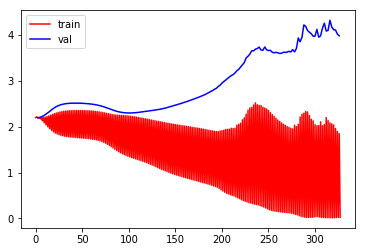

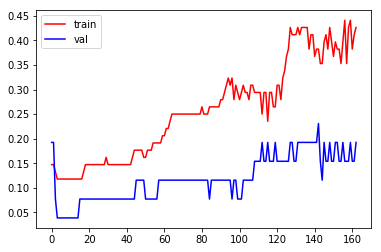

0.024774505
0.4411764705882353
0.15384615384615385


KeyboardInterrupt: 

In [380]:
trainer.train(batch_sampler, {"n_epochs":400})

In [328]:
batch_sampler.get_n_classes()

9

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt
def build_confusion_matrix(predicted_probs, true):
    n_labels = predicted_probs.shape[1]
#     assert true_y.shape == predicted_probs.shape
    result = np.zeros(shape=(n_labels, n_labels))
    
    pred = predicted_probs.argmax(axis=1)
#     true = true_y.argmax(axis=1)
    
    for pred_cls in range(n_labels):
        for true_cls in range(n_labels):
            result[true_cls, pred_cls] = np.count_nonzero(true[pred == pred_cls] == true_cls)
    norm = result.sum(axis=1)
    norm = np.maximum(norm, 1)
#     result /= norm[:, None]
    return result

def plot_confusion_matrix(confusion_matrix):
    fig = plt.figure( figsize=(20, 20))
    plt.xlabel("True classes")
    plt.ylabel("Predicted classes")
#     sns.heatmap(confusion_matrix, annot=True, vmin=0.0, vmax=1.0, cmap="YlGnBu")
    sns.heatmap(confusion_matrix, annot=True, vmin=0.0, cmap="YlGnBu")

In [359]:
x, y = batch_sampler.x_train, batch_sampler.y_train
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

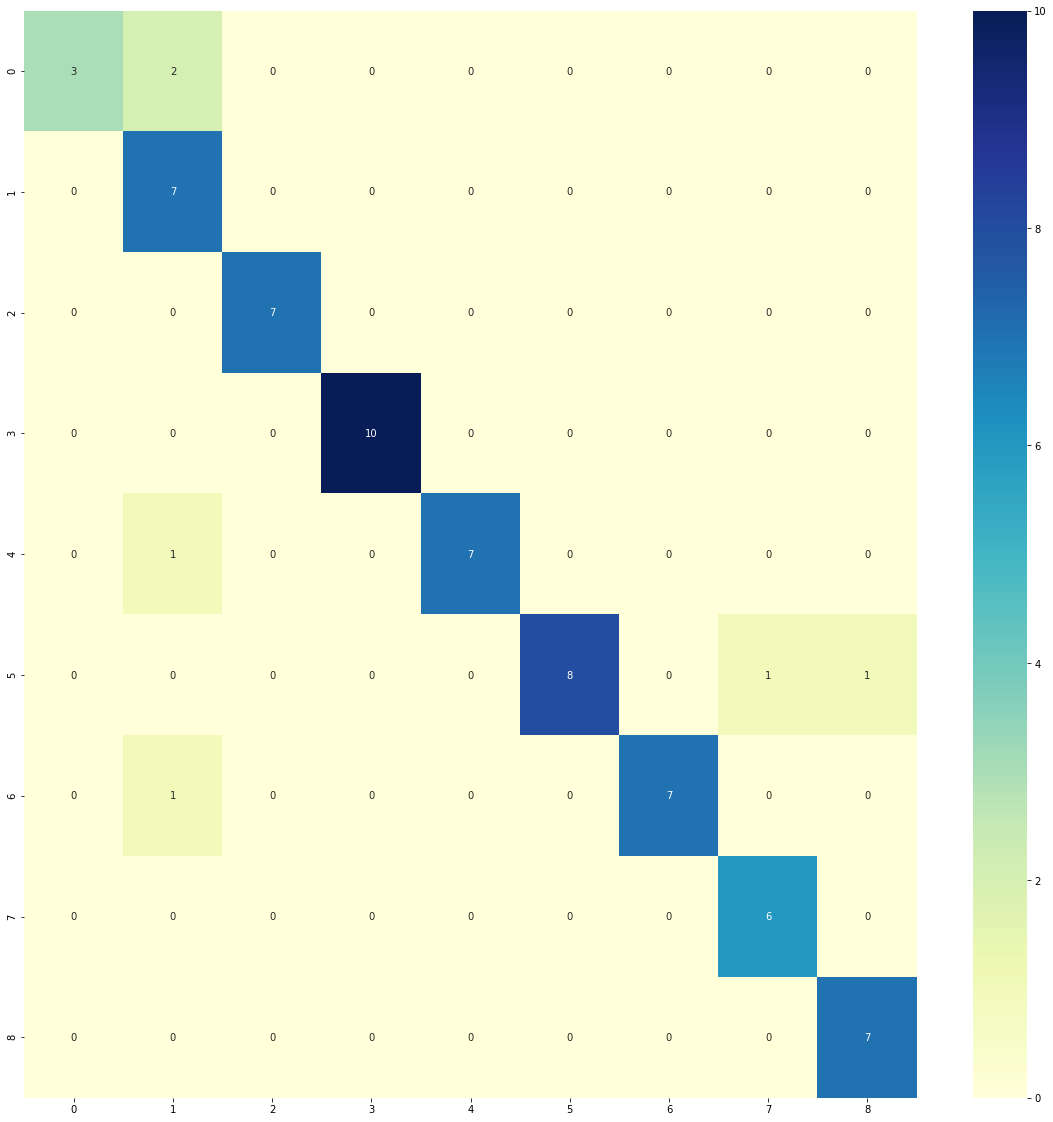

In [360]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [361]:
x, y = batch_sampler.x_test, batch_sampler.y_test
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

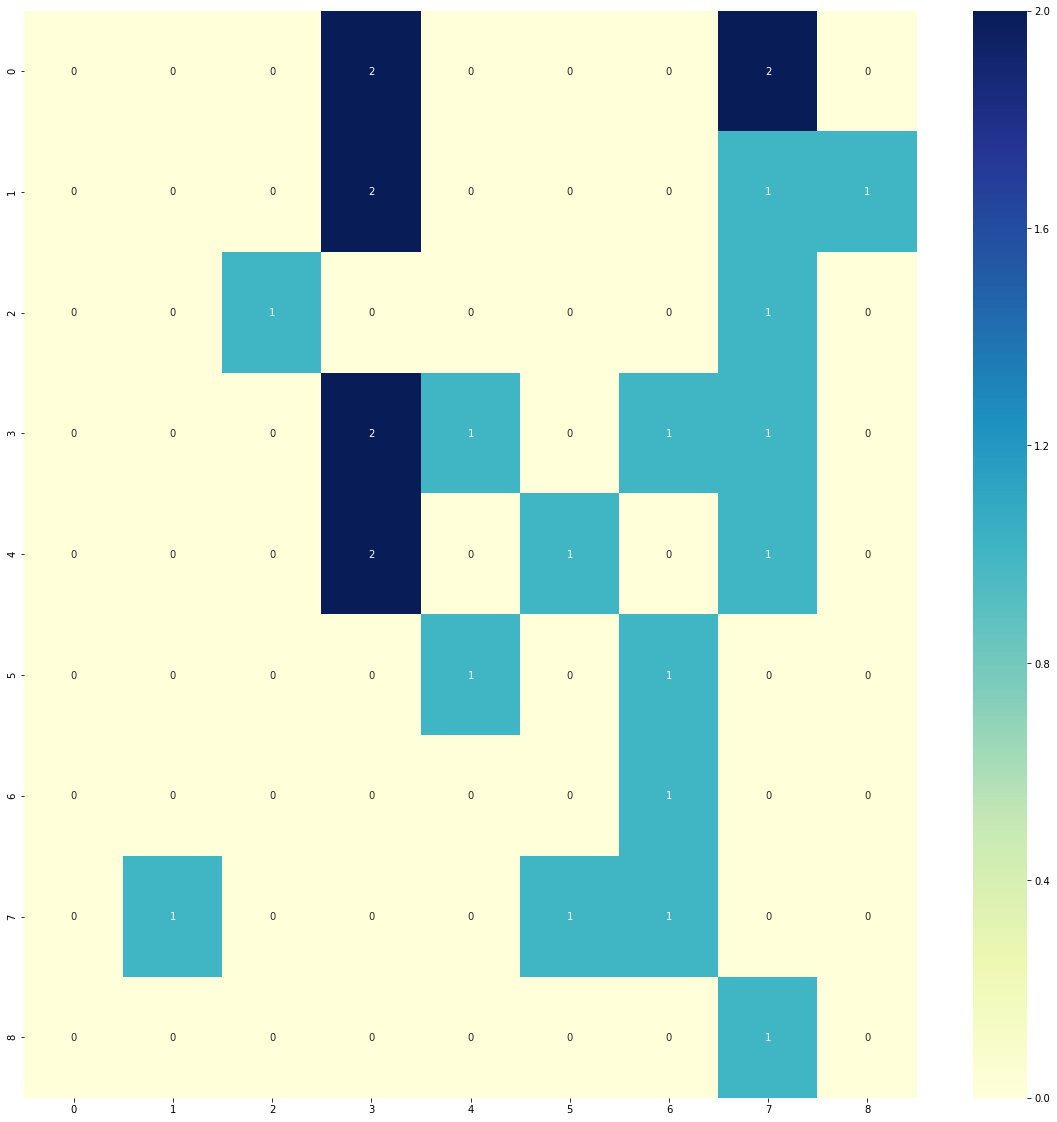

In [362]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [369]:
for code in batch_sampler.x_train:
    print(code)
    print("#######################################\n#############")

n = int(input())
a = set([int(x) for x in input().split()])
count = len(a)
if 0 in a:
    count -= 1
print(count)
#######################################
#############
b = input()
a = input()
c = []
g = 'aeiouy'
c.append(a[0])
for i in range(len(a)-1):
    if a[i] in g and a[i+1] in g:
        pass
    else:
        c.append(a[i+1])



print(''.join(c))


#######################################
#############
def read():
    return list(map(int,input().split()))
l,r,a=read()
if r<l:
    l,r=r,l
if l+a<r:
    print((l+a)*2)
else:
    a-=r-l
    print((r+a//2)*2)


#######################################
#############
n=int(input())
s=list(map(str,input()))
i=1
a=['a', 'e', 'i', 'o', 'u' ,'y']
while i<n:
    if s[i] in a and s[i-1] in a:
        del s[i]
        n-=1
    else:
        i+=1
for i in s:
    print(i,end='')

#######################################
#############
a = input()
b = ''
for i in range(len(a)):
    b = a[i] + b
print(a + b)
#######################################
##